<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%EC%86%90%EA%B8%80%EC%94%A8%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%88%AB%EC%9E%90_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,502 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
#들어가기에 앞서 파이썬의 기본적인 설정을 하였다.
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 기본 모듈 임포트
import numpy as np
import os

# 랜덤 시드 설정. 동일한 결과 재생.
np.random.seed(42)

# 그래프 관련
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font',family='NanumBarunGothic')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림 저장 위치 지정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#MNIST
#해당 데이터의 경우 지도학습이며 그림을 총 10개의 클래스로 분류하는 다중 클래스 분류이다.


In [4]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784',version=1,as_frame=False) 

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache= True, as_frame=False)

#저장된 사전의 키 확인
mnist.keys()



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist['data'], mnist['target']



In [7]:
#데이터셋에 대해서 설명하는 문자열을 값으로 가진다.
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
#훈련 세트와 테스트 세트


In [9]:
X,y = mnist['data'],mnist['target']
#data= 손글씨 이미지 데이터를 저장한 2차원 어레이
#target = 레비블로 구성된 1차원 어레이

In [10]:
X.shape
#28*28 개의 픽셀로 구성된 이미지이다.

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



그림 저장: some_digit_plot


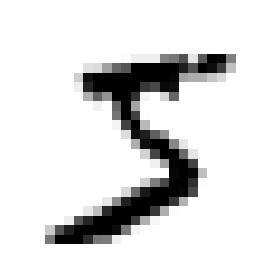

In [13]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [14]:
#실제 레이블 확인
y[0]

'5'

In [15]:
y = y.astype(np.uint8)


In [16]:
type(y[0])

numpy.uint8

In [17]:
#훈련 세트와 데스트 세트 나누기

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [18]:
#이진 분류

y_train_5 =  (y_train == 5)
y_test_5 = (y_test==5)


In [19]:
#SGD 분류기 활용 학습
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter= 1000, tol=1e-3,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
#예측하기
sgd_clf.predict([some_digit])

array([ True])

#성능 측정
1.교차검증
2.정밀도/재현율
3.ROC곡선 아래 면적 AUC측정

In [21]:
#교차검증을 통한 정확도
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [22]:
#'5아님'이라고 찍는 분류기
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit (self, X,y=None):
      pass
  def predict(self,X):
      return np.zeros((len(X),1),dtype=bool)
      

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

숫자 5를 표현하는 이미지가 전체 이미지의 10%만 차지하기 떄문에 정확도가 90가 나올 수 있다.

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # 예측기 복사, 즉 예측기를 매번 새로운 설정으로 사용
    # 이전 학습을 활용하지 못하도록 하는 것임.
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.9669
0.91625
0.96785


In [25]:
#오차 행렬
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf, X_train,y_train_5,cv=3 )

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [27]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [28]:
#정밀도와 재현율 조율

from sklearn. metrics import precision_score
precScore =  precision_score(y_train_5, y_train_pred)
precScore

0.8370879772350012

In [29]:
from sklearn.metrics import recall_score

recallScore = recall_score(y_train_5, y_train_pred)
recallScore

0.6511713705958311

In [30]:
# f1점수

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [31]:
#정밀도/재현율 트레이드오프

#결정함수
#첫번째 샘플에 대한 점수
y_scores= sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [32]:
threshold= 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [33]:
threshold = 8000

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

#예측값이 임계값이 올라감에 따라 양성에서 음성으로 바뀌면서 재현율은 떨어지고 정밀도는 올라갔다.


array([False])

In [34]:
#결정 임곗값에 따른 정밀도와 재현율

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [35]:
#정밀도-재현율-커브 함수를 이용하여 경정 임곗값에 대한 정밀도와 재현율을 모든 샘플에 대해 계산

from sklearn. metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

그림 저장: precision_recall_vs_threshold_plot


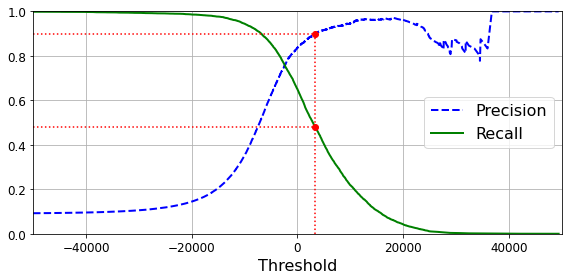

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                             
    plt.axis([-50000, 50000, 0, 1])            



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

그림 저장: precision_vs_recall_plot


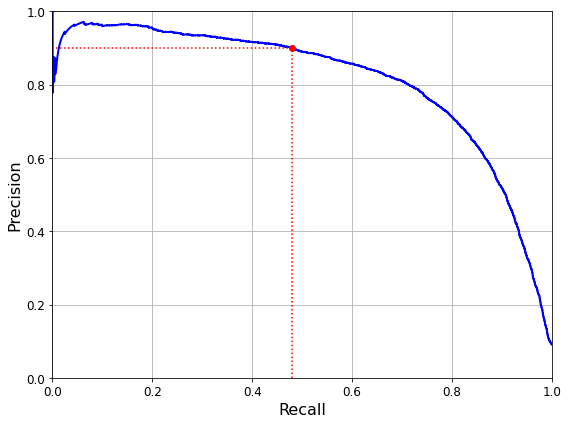

In [37]:
#정밀도/재현율 조율: 좋은 결정 임곗값 정하기
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.48, 0.48], [0., 0.9], "r:")     
plt.plot([0.0, 0.48], [0.9, 0.9], "r:")     
plt.plot([0.48], [0.9], "ro")               

# 책에서는 (0.4368,0.9)를 사용하였음.
# max_iter와 tol 매개변수 값이 달라져서 분류기 학습 결과가 살짝 달라졌기 때문임.
# plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
# plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
# plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [38]:
#정밀도가 0.9 이상이 되도록 하는 임곗점의 첫 번째 인덱스
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [39]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

#실제로 위의 점수를 임곗값으로 이용하여 정밀도를 확인하였더니 0.9이상이었다.

0.9000345901072293

In [40]:
recall_score(y_train_5, y_train_pred_90)
#재현율은 낮아졌다.

0.4799852425751706

In [41]:
#ROC 곡선 아래 면적 AUC
#ROC곡선 그리기

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [42]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

그림 저장: roc_curve_plot


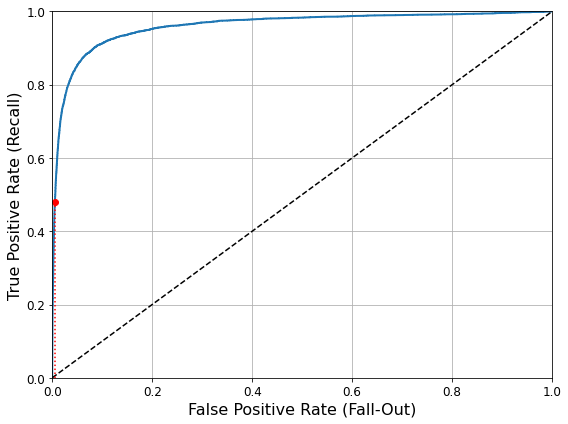

In [43]:
#ROC곡선 그리기
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 점선 대각선
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                           

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)



plt.plot([5.3323e-3, 5.3323e-3], [0., 0.48], "r:")
plt.plot([0.0, 5.3323e-3], [0.48, 0.48], "r:") 
plt.plot([5.3323e-3], [0.48], "ro")         

save_fig("roc_curve_plot")                        
plt.show()

In [44]:
#AUC
from sklearn. metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [45]:
#랜덤 포레스트 분류기의 AUC
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [46]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [47]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5,y_scores_forest)



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

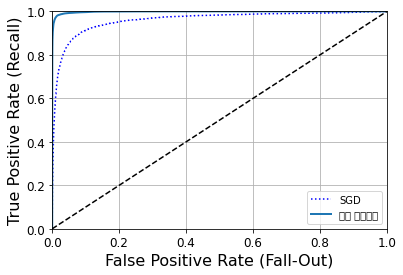

In [48]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,"랜덤 포레스트")
plt.legend(loc='lower right')
plt.show()

In [49]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

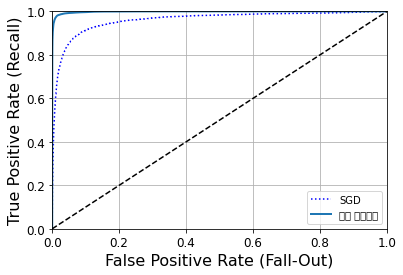

In [50]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,"랜덤 포레스트")
plt.legend(loc='lower right')
plt.show()

In [51]:

from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:3000], y_train[:3000])
svm_clf.predict([some_digit])


array([5], dtype=uint8)

In [52]:
'''from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])'''


'from sklearn.svm import SVC\n\nsvm_clf = SVC()\nsvm_clf.fit(X_train, y_train)\nsvm_clf.predict([some_digit])'

In [53]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores 



array([[ 0.80274232,  8.04358974,  3.8332485 ,  2.82335888,  5.93792506,
         9.29686556,  4.85345627,  6.96491298, -0.22908517,  1.80646062]])

In [54]:
np.argmax(some_digit_scores)


5

In [55]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [56]:
svm_clf.classes_[5]

5

In [57]:
'''from sklearn. multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])'''


'from sklearn. multiclass import OneVsRestClassifier\novr_clf = OneVsRestClassifier(SVC())\novr_clf.fit(X_train,y_train)\novr_clf.predict([some_digit])'

In [58]:
'''from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:30000], y_train[:30000])
#ovr_clf.predict([X_test[0]])
ovr_clf.predict([some_digit])'''

'from sklearn.multiclass import OneVsRestClassifier\novr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))\novr_clf.fit(X_train[:30000], y_train[:30000])\n#ovr_clf.predict([X_test[0]])\novr_clf.predict([some_digit])'

In [59]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [60]:
len(ovr_clf.estimators_)


10

In [95]:
sgd_clf.fit(X_train[:8000],y_train[:8000])
sgd_clf.predict([some_digit])


array([5], dtype=uint8)

In [96]:
sgd_clf.decision_function([some_digit])


array([[-828109.11373142, -618398.79659513, -114071.35290718,
          -2408.75303199, -460785.03349839,   24846.96086804,
        -489133.72150727, -621058.3076188 , -161533.53808872,
        -265191.15049119]])

In [97]:
cross_val_score(sgd_clf,X_train[:8000],y_train[:8000],cv=3,scoring='accuracy')


array([0.86201725, 0.86726659, 0.86346587])

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled[:8000],y_train[:8000],cv=3,scoring='accuracy')


array([0.88376453, 0.90063742, 0.89009752])

In [100]:
y_train_pred = cross_val_predict (sgd_clf,X_train_scaled[:50000],y_train[:50000],cv=3)
conf_mx = confusion_matrix(y_train[:50000],y_train_pred[:50000])
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([[4659,    0,   17,    6,    8,   51,   34,    4,  152,    1],
       [   1, 5392,   37,   24,    3,   39,    3,    6,  160,   13],
       [  25,   28, 4390,   80,   59,   21,   62,   34,  260,    9],
       [  19,   16,  117, 4374,    2,  188,   23,   39,  258,   65],
       [  14,   12,   37,    9, 4388,   12,   30,   17,  199,  141],
       [  24,   14,   33,  142,   42, 3754,   64,   14,  353,   66],
       [  24,   16,   42,    2,   41,   80, 4650,    4,   91,    1],
       [  14,    9,   50,   26,   46,   10,    4, 4716,  102,  198],
       [  19,   57,   41,   86,    3,   95,   29,    6, 4470,   36],
       [  20,   16,   27,   61,  114,   34,    2,  156,  221, 4337]])

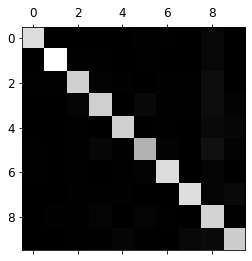

In [101]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [102]:
row_sums = conf_mx.sum(axis=1, keepdims= True)
norm_conf_mx =  conf_mx / row_sums

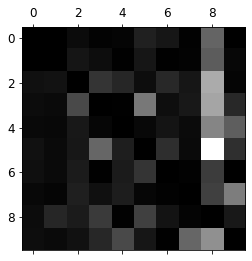

In [103]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
plt.show()



In [104]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [105]:
def plot_digits(instances, images_per_row=10, **options):
    # 사진 크기 지정
    size = 28
    # 한 행당 이미지 개수
    images_per_row = min(len(instances), images_per_row)
    # 모든 이미지를 28x28 크기로 모양 변환
    images = [instance.reshape(size,size) for instance in instances]
    # 행의 개수 계산
    n_rows = (len(instances) - 1) // images_per_row + 1
    # 행 별 이미지 저장 리스트
    row_images = []
    # 마지막 행의 빈 자리 개수 확인
    n_empty = n_rows * images_per_row - len(instances)
    # 마지막 사진은 마지막 행의 빈 자리 크기만큼 흰색으로 채워진 사진
    images.append(np.zeros((size, size * n_empty)))
    # 행 별로 모든 이미지를 하나로 병합하기
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    # 하나로 합쳐진 행 별 이미지를 모두 병합하여 하나의 이미지로 만들기
    image = np.concatenate(row_images, axis=0)
    # 병합된 사진 보여주기
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

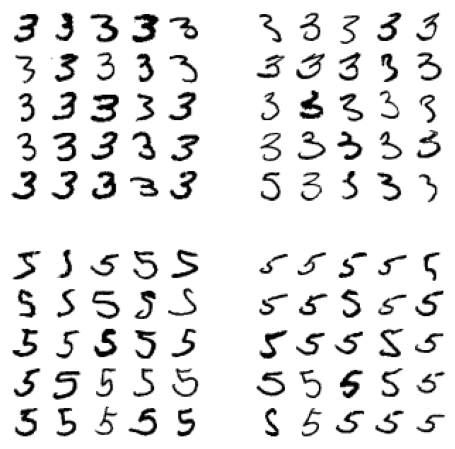

In [108]:
cl_a,cl_b =3,5
X_aa = X_train[:8000][(y_train[:8000]==cl_a)&(y_train_pred[:8000]==cl_a)]
X_ab = X_train[:8000][(y_train[:8000]==cl_a)&(y_train_pred[:8000]==cl_b)]
X_ba = X_train[:8000][(y_train[:8000]==cl_b)&(y_train_pred[:8000]==cl_a)]
X_bb = X_train[:8000][(y_train[:8000]==cl_b)&(y_train_pred[:8000]==cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)
plt.show()

In [109]:
#다중 레이블 분류

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)




KNeighborsClassifier()

In [110]:
knn_clf.predict([some_digit])


array([[False,  True]])

In [111]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')


0.976410265560605

In [112]:
#다중 출력 분류

noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train +noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod =X_test + noise
y_train_mod =X_train
y_test_mod = X_test


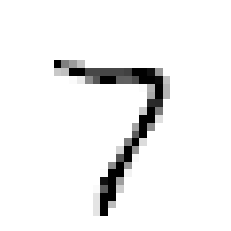

In [115]:
some_index=0
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)